In [80]:
from sklearn import datasets,model_selection,preprocessing
from sklearn.metrics import accuracy_score

In [81]:
iris=datasets.load_iris()

In [82]:
x=iris.data
y=iris.target

In [83]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0)

Logistic Regression Implementation

In [72]:
#importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [73]:
#preprocessing the data
sc=preprocessing.StandardScaler()
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [75]:
#applying cross validation  for one vs rest approach
clf=LogisticRegression(multi_class='ovr',solver='saga')
print(cross_val_score(clf,x_train,y_train,cv=5).mean())

0.9132693393562958


In [76]:
#applying cross validation  for multinomial approach
clf=LogisticRegression(multi_class='multinomial',solver='saga')
print(cross_val_score(clf,x_train,y_train,cv=5).mean())

0.9473273103707885


In [77]:
#choosing multinomial approach on the basis of cross validation score
clf=LogisticRegression(C=1,multi_class='multinomial',solver='saga')
clf.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
#predicting the values
y_pred=clf.predict(x_test)

In [79]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.9736842105263158


Naive Bayes Implementation

In [90]:
#importing necessary modules
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score

In [91]:
#aplying cross validation on GaussianNB
clf=GaussianNB()
print(cross_val_score(clf,x_train,y_train,cv=5).mean())

0.9473273103707885


In [92]:
#applying cross validation on MultinomialNB
clf=MultinomialNB()
print(cross_val_score(clf,x_train,y_train,cv=5).mean())

0.7138057594579333


In [93]:
#choosing GaussianNB classifier on the basis of cross validation
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
#predicting the values
y_pred=clf.predict(x_test)

In [95]:
#accuracy score
print(accuracy_score(y_test,y_pred))

1.0


K-Nearest Neighbors Implementation

In [97]:
#preprocessing the data
sc=preprocessing.StandardScaler()
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [99]:
#importing necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

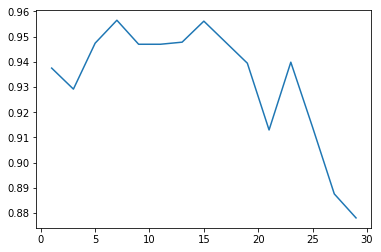

In [108]:
#plotting graph to find right value of nearest neighbors from cross validation
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(1,30,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    x.append(cross_val_score(clf,x_train,y_train,cv=5).mean())
    y.append(i)
plt.plot(y,x)
plt.show()

In [109]:
#choosing n_neighbors=7 from graph
clf=KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [110]:
#predicting the value
y_pred=clf.predict(x_test)

In [112]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.9736842105263158


Support Vector Machine Implementation

In [113]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score

In [137]:
clf = SVC( decision_function_shape='ovo')
grid={'C':[1,10,100,1000,5000],'gamma':[.1,.2,.3,.4,.5,.6,.7,.8,.9]}
clf=GridSearchCV(clf,grid,n_jobs=-1,cv=5)
clf.fit(x_train,y_train)


C:\Users\shivani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000, 5000], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
clf.best_score_

0.9553571428571429

In [144]:
clf= SVC(C=1,decision_function_shape='ovo',gamma=.2)
clf.fit(x_train,y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
y_pred=clf.predict(x_test)

In [146]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158
